<a href="https://colab.research.google.com/github/Holden-T-UVM/lab-8-public/blob/main/Lab_8_cee_3010_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Extra Libraries
from IPython import get_ipython
from IPython.display import display

#Module 1
import numpy as np
import matplotlib.pyplot as plt

#
# User Inputs
#
# Loads in pounds
P1 = float(input("Enter load P1 (lb): "))
P2 = float(input("Enter load P2 (lb): ")) # Add the python script for input load P2
P3 = float(input("Enter load P3 (lb): ")) # Add the python script for input load P3


# Distances (in inches)
a = float(input("Enter distance a (in) for load P1: "))
b = float(input("Enter distance b (in) for load P2: "))
c = float(input("Enter distance c (in) for load P3: ")) # Add the python script for input distance of load P3 here

# Beam span in inches
L = float(input("Enter span L (in): "))

# Point along the beam at which deflection and rotation are calculated (in inches)
X = float(input("Enter point X (in) where deflection and rotation are to be calculated: "))

# Material properties
E = float(input("Enter modulus of elasticity E (psi): "))
I = float(input("Enter moment of inertia I (in^4): "))
# Add the python script for input for moment of interial I here

#
# Reaction Forces Calculation
#
Rb = (P1 * a + P2 * b + P3 * c) / L  # Reaction at right support
Ra = (P1 + P2 + P3) - Rb # Add reaction calculation at support Ra

# the rest
print("reaction at support Ra:", Ra, "lb")
print("reaction at support Rb:", Rb, "lb")


Enter load P1 (lb): 5
Enter load P2 (lb): 10
Enter load P3 (lb): 15
Enter distance a (in) for load P1: 10
Enter distance b (in) for load P2: 15
Enter distance c (in) for load P3: 20
Enter span L (in): 25
Enter point X (in) where deflection and rotation are to be calculated: 17
Enter modulus of elasticity E (psi): 29000000
Enter moment of inertia I (in^4): .5508
reaction at support Ra: 10.0 lb
reaction at support Rb: 20.0 lb


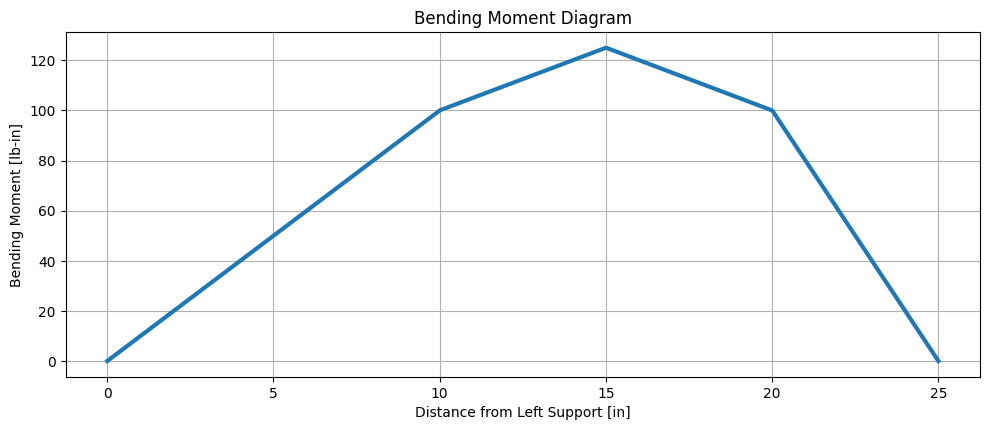

In [6]:
#Module 2
# Shear Force and Bending Moment Diagrams
#
dx = L / 10000.0                 #   Dividing beams into 1000 sections so that we can get smooth curve.
x = np.arange(0, L + dx, dx)    #   np.arrange (start, stop, step) - creates 1D array with evenly spaced values
M = np.zeros_like(x)            #   prepare array to store bending moment
V = np.zeros_like(x)            #   prepare array to store shear force

for i, xi in enumerate(x):
    if xi <= a:
        M[i] = Ra * xi
        V[i] = Ra
    elif xi <= b:
        M[i] = Ra * xi - P1 * (xi - a)
        V[i] = Ra - P1
    elif xi <= c:
        M[i] = Ra * xi - P1 * (xi - a) - P2 * (xi - b)
        V[i] = Ra - P1 - P2
    else:
        M[i] = Ra * xi - P1 * (xi - a) - P2 * (xi - b) - P3 * (xi - c)  # BM calculation for xi >= c
        V[i] = Ra - P1 - P2 - P3  # SF calculation for xi >= c

# Plotting the diagrams
plt.figure(figsize=(10, 8))         #create new figure space of wifth x height

# Bending Moment Diagram
plt.subplot(2, 1, 1)                #divides the figure into a grid of 2 rows and 1 column
plt.plot(x, M, 'r', linewidth=3)
plt.grid(True)
plt.title("Bending Moment Diagram") #add title of the graph as "Bending Moment Diagram" hint: use plt.title("title here")
plt.xlabel("Distance from Left Support [in]")
plt.ylabel("Bending Moment [lb-in]")

# Shear Force Diagram
# write the code for shear force diagram here hint: replace the parameter M with V form the codes for plotting bending moment
plt.subplot(2, 1, 2)                #divides the figure into a grid of 2 rows and 1 column
plt.plot(x, V, linewidth=3)
plt.grid(True)
plt.title("Shear Force Diagram")
plt.xlabel("Distance from Left Support [in]")
plt.ylabel("Shear Force [lb]")

plt.tight_layout()                  # Adjusts the spacing between subplots so they dont overlap
plt.show()


In [8]:
#
# Deflection and Rotation Using Virtual Work
#
# Compute the virtual moment diagram m_t and its derivative
m_t = np.zeros_like(x)
m_t_d= np.zeros_like(x)
for i, xi in enumerate(x):
    if xi <= X:
        m_t[i] = xi * (L - X) / L
        m_t_d[i] = (L - X) / L  # derivative when xi <= X
    else:
        m_t[i] = X * (L - xi) / L
        m_t_d[i] = -X / L       # derivative when xi > X

# Use the virtual work theorem to compute deflection and rotation at X
delta = np.trapezoid(M * m_t, x) / (E * I)              # x = np.arange(0, L + dx, dx) knows to take range 0 to L
theta = np.trapezoid(M * m_t_d, x) / (E * I) #Write the code script line for calculating rotation

#
# Display Results
#
print("\n--- Results at x = {:.2f} in ---".format(X))
print("Deflection, Δ = {:.6e} in".format(delta))
print("Rotation, θ = {:.6e} rad".format(theta)) #Print the rotation here


--- Results at x = 17.00 in ---
Deflection, Δ = 4.107401e-04 in
Rotation, θ = 1.730633e-06 rad
